# Table of contents
1. [Notebook Setup](#setup)
2. [Dataset Formation](#data-formation)
3. [Data Analysis](#data-analysis)
    1. [Histogram Plots](#histograms)
    2. [Correlation Heatmap](#correlation-heatmap)
    3. [Takeawyas](#takeaways)
4. [Build Pipeline](#pipeline)
5. [Parameter Tuning](#tuning)
    1. [Model Selection](#select)
        1. [Parameter Search](#param)
        2. [Model Search](#model)
    2. [Selected Model Tuning](#final-tune)

# Notebook setup <a name="setup"></a>
In this section we import the packages that will be used throughout the projects, and select a random seed.

In [63]:
#Installing pandas
import pandas as pd
#%conda install -c conda-forge pandasql

In [64]:
#Import standard packages
import pandasql as psql
import random as rand

#Data visualisation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## scikit-learn modules:

#starting the pipeline
# preprocessing
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, QuantileTransformer, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectFpr, f_classif
from sklearn.impute import SimpleImputer


# model training/tuning
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer


# models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# model validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, make_scorer


# dataframe viewing rows
#pd.set_option('display.max_rows', 100)

In [65]:
#Setting random seed for the notebook
seed_choice = 7
seed = rand.Random(7)

# Dataset Formation <a name="data-formation"></a>
In this section we read in our data from kaggle, clean it and define the feature list.

In [66]:
#reading in .csv file from https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability
water = pd.read_csv('water_potability.csv')

In [67]:
#Defining the feature list for our data. These are the variable that our AI will train on.
feature_list = ['ph', # indicate ph
                'Hardness', # indicates hardness
                'Solids', # indicates solids
                'Chloramines', # indicates Chloramines
                'Sulfate', # indicates Sulfate
                'Conductivity', # indicates Conductivity
                'Organic_carbon', # indicates Organic_carbon
                'Trihalomethanes', # indicates Trihalomethanes
                'Turbidity'] # indicates Turbidity

In [68]:
#remove below comment to view data
#water

In [69]:
#Removing the NaN values for water data (only NaN values were in ph, sulfate and trihalomethanes). Remove last comment to view
waternonan = psql.sqldf('select * from water where ph is not null and Sulfate is not null and Trihalomethanes is not null')
#waternonan

In [70]:
#checking successfull removal of NaN values
check_nan = waternonan['ph' or 'Trihalomethanes' or 'Hardness' or 'Solids' or 'Chloramines' or 'Sulfate' or 'Conductivity' or 'Organic_carbon' or 'Turbidity' or 'Potability'].isnull().sum()
print(check_nan)

0


# Dataset Analysis <a name="data-analysis"></a>
In this section we perform some preliminary analysis on our dataset. We plot each of our variables on a histogram to get a sense of the shape of our data. We also creat the correlation heatmap for our data.

## Histogram plots <a name="histograms"></a> 

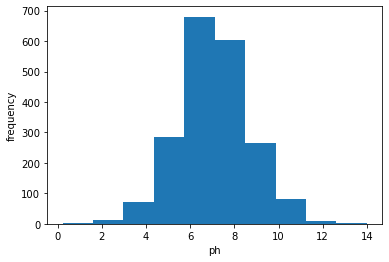

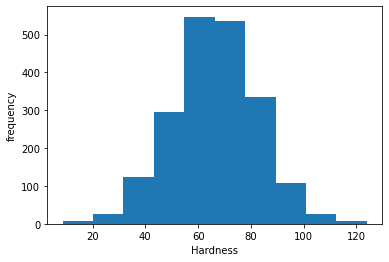

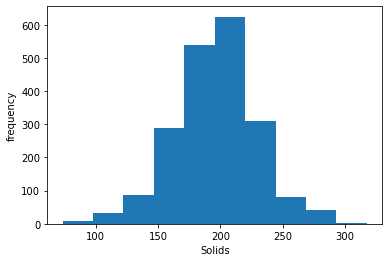

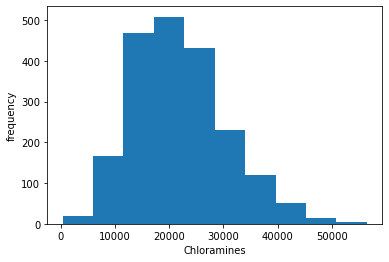

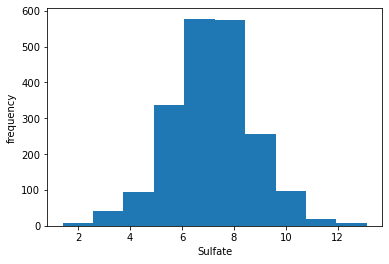

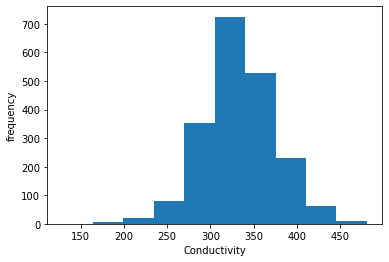

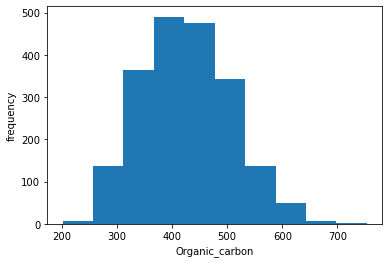

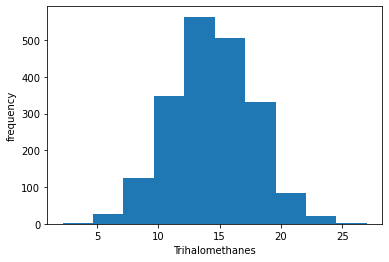

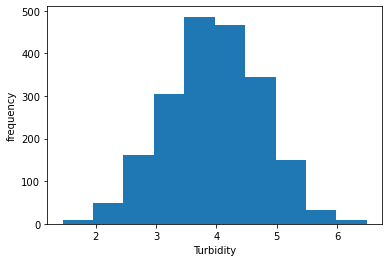

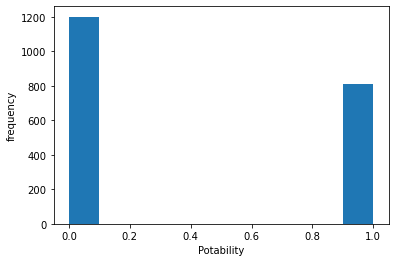

In [71]:
#Plot a histogram of each of the features of our data
i=0
for feature in [waternonan.ph, waternonan.Trihalomethanes, waternonan.Hardness, waternonan.Solids, waternonan.Chloramines, waternonan.Sulfate, waternonan.Conductivity, waternonan.Organic_carbon, waternonan.Turbidity, waternonan.Potability]:
    plt.ylabel('frequency')
    plt.xlabel(waternonan.columns.values[i])
    plt.hist(feature)
    plt.show()
    i += 1

## Corellation Heatmap <a name="correlation-heatmap"></a> 

<AxesSubplot:>

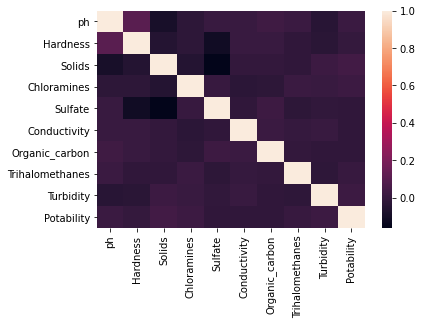

In [72]:
sns.heatmap(waternonan.corr())


## Takeaways <a name="takeaways"></a> 
### Histograms
The features in our data look mor or less normally distributed, so there is no need to logarithmically or exponentially scale any of them. 

We have roughly 2000 data points, with roughly 40% of them being examples of potable water. 
### Corellation Heatmap
Variables and potability are generally uncorrelated. There are no extraneous variables to remove.

# Build Pipeline <a name="pipeline"></a>

In [79]:
# Creating an 80-20 split training set and test data
index_list = seed.sample(range(2010), 1609)
train_set = waternonan.iloc[index_list]
test_data = waternonan.iloc[waternonan.index.difference(index_list)]
#train_set
#test_data

In [80]:
# define feature column data, list of features feature_list was created in the section above
X = waternonan[feature_list].values

# define label column
y = waternonan['Potability'].values